In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import re
from sklearn import tree
import scikitplot as skplt
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv("labeled_data.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
df.rename(columns={'class':'tweet_type'}, inplace = True)

In [4]:
normal_tweet = df[df.tweet_type == 2]
normal_tweet.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,tweet_type,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
40,40,3,0,1,2,2,""" momma said no pussy cats inside my doghouse """
63,63,3,0,0,3,2,"""@Addicted2Guys: -SimplyAddictedToGuys http://..."
66,66,3,0,1,2,2,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo..."
67,67,3,0,1,2,2,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these..."


In [5]:
hate_tweet = df[df.tweet_type == 0]
hate_tweet.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,tweet_type,tweet
85,85,3,2,1,0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,90,3,3,0,0,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,111,3,3,0,0,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,186,3,3,0,0,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,204,3,2,1,0,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."


In [6]:
offensive_tweet = df[df.tweet_type == 1]
offensive_tweet.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,tweet_type,tweet
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."


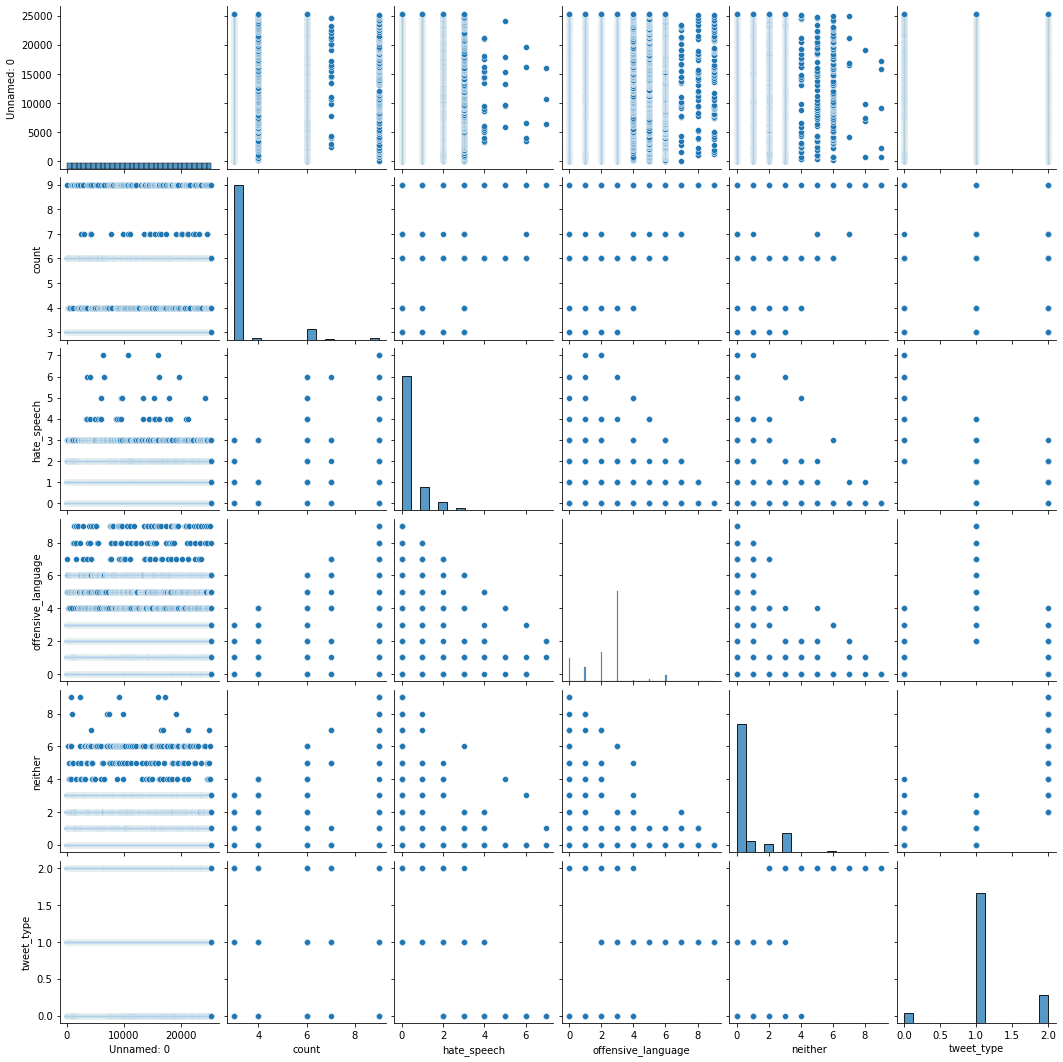

In [35]:
sns.pairplot(df)

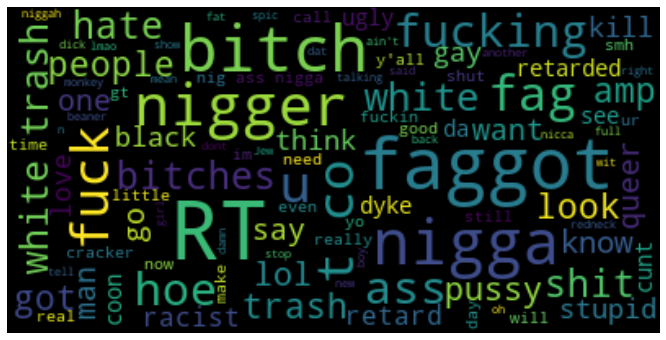

In [7]:
from PIL import Image
from wordcloud import WordCloud
text = " ".join(review for review in hate_tweet.tweet)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
fig = plt.figure(figsize = (20, 6)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

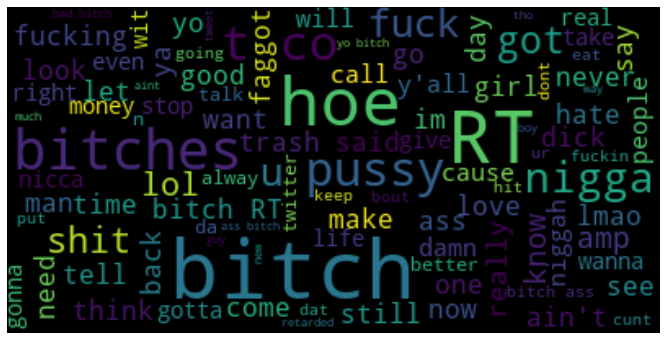

In [8]:
text = " ".join(review for review in offensive_tweet.tweet)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
fig = plt.figure(figsize = (20, 6)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

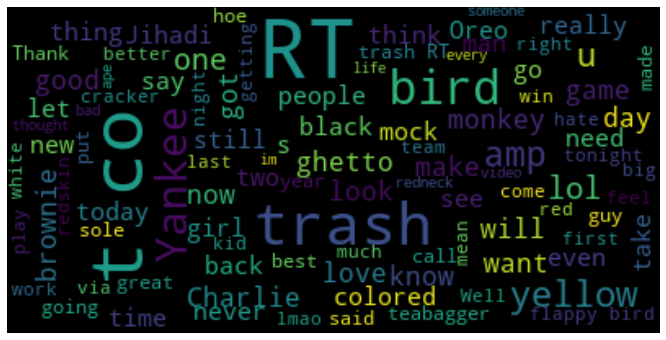

In [9]:
text = " ".join(review for review in normal_tweet.tweet)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
fig = plt.figure(figsize = (20, 6)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
def filter(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

In [11]:
df['filtered_tweet'] = df['tweet'].apply(filter)
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,tweet_type,tweet,filtered_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt as a woman you shouldn t complain about cle...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt boy dats cold tyga dwn bad for cuffin dat h...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt dawg rt you ever fuck a bitch and she start...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt g anderson based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt the shit you hear about me might be true or...


In [12]:
from sklearn.model_selection import train_test_split
X = df['filtered_tweet']
y = df['tweet_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = None)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [14]:
x_train_counts = count_vect.fit_transform(X_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

In [15]:
x_test_counts = count_vect.transform(X_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=500)

In [17]:
predictions = model.predict(x_test_tfidf)
print("Random Forest classifier (without oversampling) :", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Random Forest classifier (without oversampling) : 0.8829937462174703
              precision    recall  f1-score   support

           0       0.52      0.12      0.19       320
           1       0.89      0.97      0.93      3802
           2       0.86      0.78      0.82       835

    accuracy                           0.88      4957
   macro avg       0.76      0.62      0.65      4957
weighted avg       0.86      0.88      0.86      4957



In [18]:
cnt_non_fraud = df[df['tweet_type'] == 2 ]['filtered_tweet'].count()
df_class_fraud = df[df['tweet_type'] == 0]
df_class_nonfraud = df[df['tweet_type'] == 2]
df_class_offensive = df[df['tweet_type'] == 1]
df_class_fraud_oversample = df_class_fraud.sample(cnt_non_fraud, replace=True)
df_class_offensive_oversample = df_class_offensive.sample(cnt_non_fraud, replace=True)
df_oversampled = pd.concat([df_class_nonfraud, df_class_fraud_oversample, df_class_offensive_oversample], axis=0)

print('Random over-sampling:')
print(df_oversampled['tweet_type'].value_counts())

Random over-sampling:
2    4163
0    4163
1    4163
Name: tweet_type, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
X1 = df_oversampled['filtered_tweet']
y1 = df_oversampled['tweet_type']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, stratify = None)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect1 = CountVectorizer(stop_words='english')
transformer1 = TfidfTransformer(norm='l2',sublinear_tf=True)

In [21]:
x_train_counts1 = count_vect1.fit_transform(X_train1)
x_train_tfidf1 = transformer1.fit_transform(x_train_counts1)

In [22]:
x_test_counts1 = count_vect1.transform(X_test1)
x_test_tfidf1 = transformer1.transform(x_test_counts1)

In [23]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=400)
model1.fit(x_train_tfidf1,y_train1)

RandomForestClassifier(n_estimators=400)

In [24]:
predictions1 = model1.predict(x_test_tfidf1)
print("Random Forest classifier (oversampling) :", accuracy_score(y_test1, predictions1))
print(classification_report(y_test1, predictions1))

Random Forest classifier (oversampling) : 0.9315452361889511
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       841
           1       0.95      0.88      0.91       838
           2       0.92      0.97      0.94       819

    accuracy                           0.93      2498
   macro avg       0.93      0.93      0.93      2498
weighted avg       0.93      0.93      0.93      2498



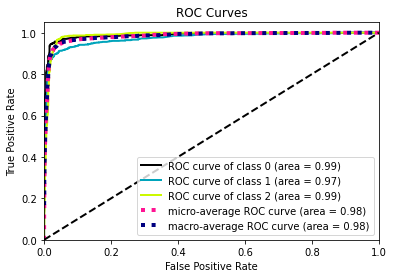

In [25]:
roccurve = model1.predict_proba(x_test_tfidf1)
skplt.metrics.plot_roc(y_test1, roccurve)
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train_tfidf,y_train)
predict_log = logreg.predict(x_test_tfidf)
print("Logistic Regression (without oversampling) :", accuracy_score(y_test, predict_log))
print(classification_report(y_test, predict_log))

Logistic Regression (without oversampling) : 0.8892475287472261
              precision    recall  f1-score   support

           0       0.51      0.15      0.24       320
           1       0.91      0.96      0.93      3802
           2       0.85      0.83      0.84       835

    accuracy                           0.89      4957
   macro avg       0.75      0.65      0.67      4957
weighted avg       0.87      0.89      0.87      4957



In [27]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression(random_state=42)
logreg1.fit(x_train_tfidf1,y_train1)
predict_log1 = logreg1.predict(x_test_tfidf1)
print("Logistic Regression (oversampling) :", accuracy_score(y_test1, predict_log1))
print(classification_report(y_test1, predict_log1))

Logistic Regression (oversampling) : 0.8967173738991193
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       841
           1       0.92      0.84      0.88       838
           2       0.89      0.96      0.92       819

    accuracy                           0.90      2498
   macro avg       0.90      0.90      0.90      2498
weighted avg       0.90      0.90      0.90      2498



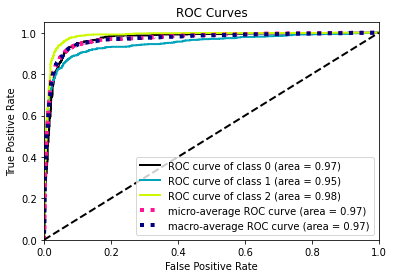

In [28]:
roccurve1 = logreg1.predict_proba(x_test_tfidf1)
skplt.metrics.plot_roc(y_test1, roccurve1)
plt.show()

In [29]:
from sklearn import svm
lin_clf = svm.LinearSVC()
lin_clf.fit(x_train_tfidf1,y_train1)
predict_svm = lin_clf.predict(x_test_tfidf1)
print("SVM(oversampling) :", accuracy_score(y_test1, predict_svm))
print(classification_report(y_test1, predict_svm))

SVM(oversampling) : 0.9151321056845476
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       841
           1       0.94      0.85      0.89       838
           2       0.92      0.95      0.93       819

    accuracy                           0.92      2498
   macro avg       0.92      0.92      0.91      2498
weighted avg       0.92      0.92      0.91      2498



In [31]:
from sklearn import svm
lin_clf = svm.LinearSVC()
lin_clf.fit(x_train_tfidf,y_train)
predict_svm = lin_clf.predict(x_test_tfidf)
print("SVM(without oversampling) :", accuracy_score(y_test, predict_svm))
print(classification_report(y_test, predict_svm))

SVM(without oversampling) : 0.8928787573128909
              precision    recall  f1-score   support

           0       0.53      0.25      0.34       320
           1       0.92      0.96      0.94      3802
           2       0.84      0.85      0.84       835

    accuracy                           0.89      4957
   macro avg       0.76      0.69      0.71      4957
weighted avg       0.88      0.89      0.88      4957



In [32]:
model2 = tree.DecisionTreeClassifier(criterion='gini' , random_state = 42)
model2.fit(x_train_tfidf, y_train)
y_predicted1 = model2.predict(x_test_tfidf)
print("Decision Tree Accuracy(without oversampling) :", accuracy_score(y_test, y_predicted1))
print(classification_report(y_test, y_predicted1))

Decision Tree Accuracy(without oversampling) : 0.8829937462174703
              precision    recall  f1-score   support

           0       0.36      0.24      0.29       320
           1       0.92      0.94      0.93      3802
           2       0.84      0.86      0.85       835

    accuracy                           0.88      4957
   macro avg       0.71      0.68      0.69      4957
weighted avg       0.87      0.88      0.88      4957



In [33]:
model3 = tree.DecisionTreeClassifier(criterion='gini' , random_state = 42)
model3.fit(x_train_tfidf1, y_train1)
y_predicted2 = model3.predict(x_test_tfidf1)
print("Decision Tree Accuracy(oversampling) :", accuracy_score(y_test1, y_predicted2))
print(classification_report(y_test1, y_predicted2))

Decision Tree Accuracy(oversampling) : 0.8987189751801441
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       841
           1       0.94      0.83      0.88       838
           2       0.94      0.90      0.92       819

    accuracy                           0.90      2498
   macro avg       0.91      0.90      0.90      2498
weighted avg       0.90      0.90      0.90      2498



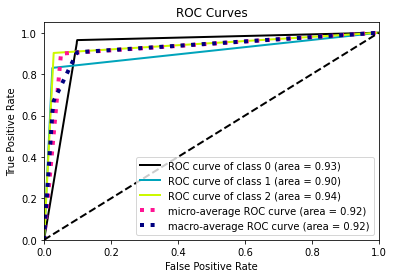

In [34]:
roccurve3 = model3.predict_proba(x_test_tfidf1)
skplt.metrics.plot_roc(y_test1, roccurve3)
plt.show()